## Exploratory Data Analysis for Restuarant Reviews Dataset

### Import dependencies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
import re

print("Libraries imported successfully")

Libraries imported successfully


### Load the cleaned dataset

In [34]:
df = pd.read_csv("../data/cleaned_reviews_noempty.csv")
print("Columns: ", df.columns.tolist())
print("Data Size: ", df.shape)

Columns:  ['store_name', 'rating', 'review', 'reviewer_name']
Data Size:  (1803, 4)


### Basic Summary Statistics

In [35]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("Rating distribution:")
print(df['rating'].value_counts(normalize=True))
print("\nReview length summary:")
print(df['review_length'].describe())

print(f"\nUnique store names: {df['store_name'].nunique()}\n")
print(f"Unique reviewer names: {df['reviewer_name'].nunique()}")

Rating distribution:
rating
5    0.512479
4    0.241819
3    0.113145
1    0.078758
2    0.053799
Name: proportion, dtype: float64

Review length summary:
count    1803.000000
mean       30.409318
std        37.935864
min         1.000000
25%        12.000000
50%        20.000000
75%        33.000000
max       486.000000
Name: review_length, dtype: float64

Unique store names: 110

Unique reviewer names: 1768


### Ratings Visualisation

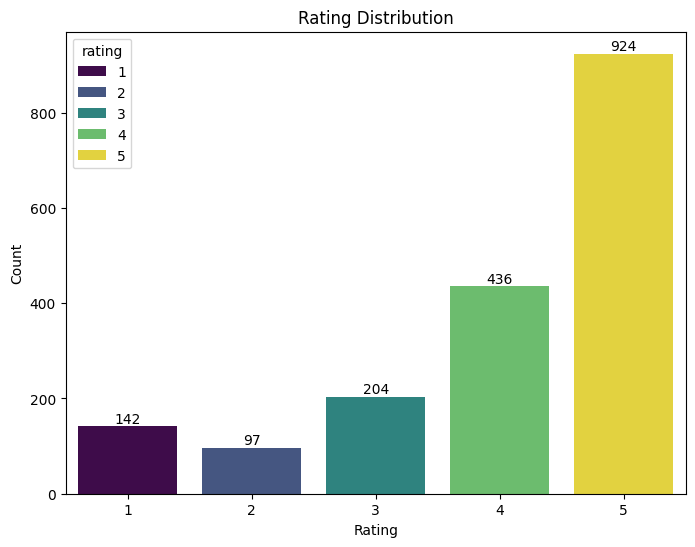

In [36]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', data=df, hue='rating', palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('../plots/rating_distribution.png')
plt.show()

### Review Length Distribution

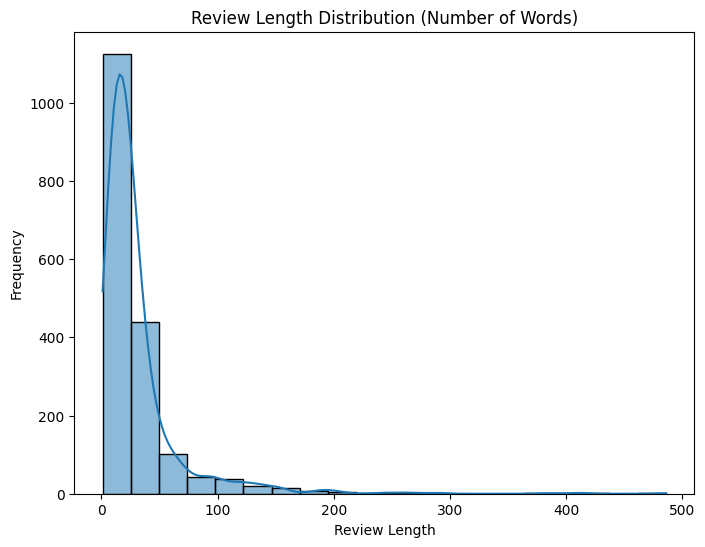

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Review Length Distribution (Number of Words)')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.savefig('../plots/review_length_distribution.png')
plt.show()

### Ratings vs Review Length

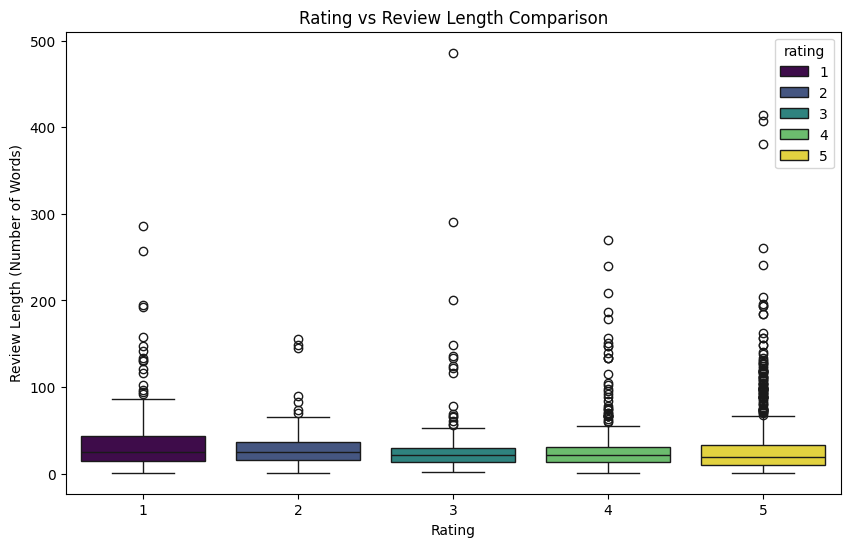

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_length', data=df, hue='rating', palette='viridis')
plt.title('Rating vs Review Length Comparison')
plt.xlabel('Rating')
plt.ylabel('Review Length (Number of Words)')
plt.savefig('../plots/review_length_vs_rating.png')
plt.show()



This plot displays the relationship between Ratings and Review Length, as well as the presence of outliers for each rating category which lies outside the interquartile range.

Generally, the median review length for each rating category is relatively constant, the 75 percentile however sees a "u" shape, where rating 1, which indicates a very low score and rating 5, which indicates the highest score have the highest two 75 percentile review lengths, while rating 3, which indicates neutral, has the lowest 75 percentile.

This may be indicative of satisfied and disatisfied reviewers willing to leave comments of longer length while reviewers who felt neutral with regards to their experience are likely to have less things to say.

### Word Frequency Analysis

In [39]:
# get the list of stop words (words that are not meaningful)
stop_words = set(stopwords.words('english'))
# get all the reviews and put it in as a long string separated by a space
all_text = df['review'].str.cat(sep=' ').lower()
# convert to "word", ",", "of"
tokens = word_tokenize(all_text)
# filter for only useful words
useful_words = [] 
for token in tokens:
    if token not in stop_words and token.isalpha():
        useful_words.append(token)
word_freq = Counter(useful_words)

print("List of 10 most common words is {}".format(word_freq.most_common(10)))

List of 10 most common words is [('food', 600), ('good', 559), ('service', 433), ('place', 362), ('delicious', 288), ('great', 262), ('nice', 257), ('taste', 255), ('staff', 184), ('restaurant', 161)]


The top 10 words are a combination of positive words and nouns. This might reflect a large proportion of reviews showing positive reviews of the locations.

### Word Frequency Visual

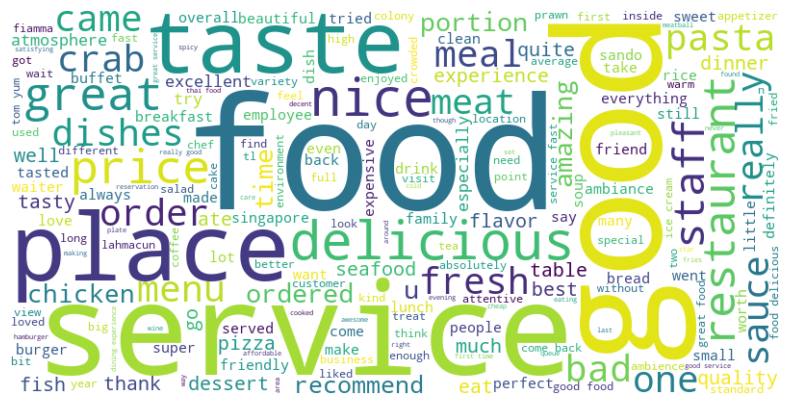

In [40]:
# word cloud generator, width and height are the fixed variables, generate the useful words that was previously obtained from the analysis above
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(useful_words))
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../plots/word_cloud.png')
plt.show()

### Store-specific analysis

In [41]:
# calc store stats with average rating and review length
store_stats = df.groupby('store_name').agg(
    avg_rating=('rating', 'mean'),
    median_review_length=('review_length', 'median')
).sort_values(by='avg_rating', ascending=False)

print(store_stats)


                                 avg_rating  median_review_length
store_name                                                       
Good Bites                         4.915493                   9.0
Fiamma                             4.670455                  50.0
Lighthouse Bistro                  4.626667                  32.0
49 SEATS                           4.614286                  10.0
Haci'nin Yeri - Yigit Lokantasi    4.545455                  31.0
...                                     ...                   ...
Restoran Todak (Orang Asli)        3.148148                  25.5
Baskent Aspava                     3.090909                  26.0
Medeniyetler Sofrasi               3.000000                  18.0
Popeyes                            3.000000                  16.0
Salih Usta                         2.833333                  29.5

[110 rows x 2 columns]
